In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install quandl
import quandl

In [ ]:
import yfinance as yf
data = yf.download("GOOGL", start="2010-01-01", end="2023-01-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,15.689439,15.753504,15.621622,15.684434,15.645692,78169752
2010-01-05,15.695195,15.711712,15.554054,15.615365,15.576794,120067812
2010-01-06,15.662162,15.662162,15.174174,15.221722,15.184123,158988852
2010-01-07,15.250250,15.265265,14.831081,14.867367,14.830644,256315428
2010-01-08,14.814815,15.096346,14.742492,15.065566,15.028353,188783028
2010-01-11,15.126627,15.126627,14.865866,15.042793,15.005637,288227484
2010-01-12,14.956206,14.968969,14.714715,14.776777,14.740278,193937868
2010-01-13,14.426677,14.724224,14.361862,14.691942,14.655653,259604136
2010-01-14,14.612112,14.869870,14.584835,14.761011,14.724551,169434396


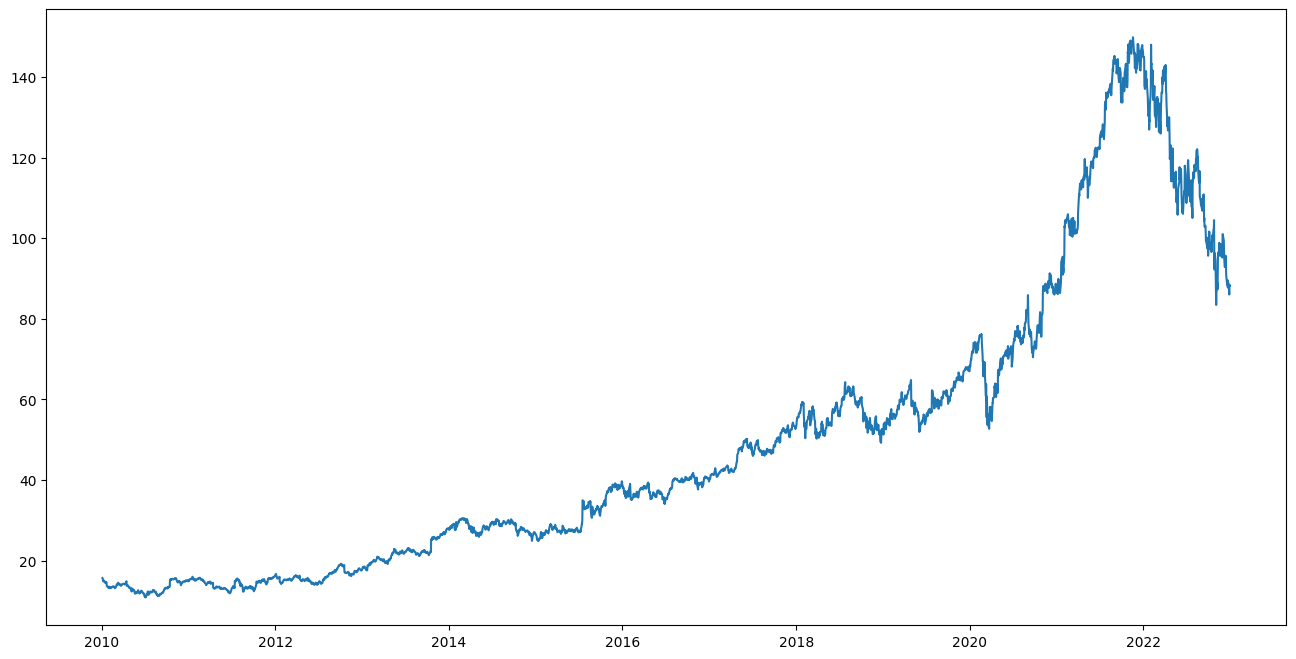

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Close Price history')


In [ ]:
data['Open - Close'] = data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']
data = data.dropna()

In [ ]:
x = data[['Open - Close', 'High - Low']]
x.head()

,Open - Close,High - Low
Date,,
2010-01-04,0.005005,0.131882
2010-01-05,0.079830,0.157658
2010-01-06,0.440440,0.487988
2010-01-07,0.382883,0.434184
2010-01-08,-0.250751,0.353854


In [ ]:
Y = np.where(data['Close'].shift(-1) > data['Close'], 1, -1)

In [ ]:
Y

array([-1, -1, -1, ...,  1, -1, -1])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.25, random_state=44)

In [ ]:

#implementation of KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#using gridsearch to find the best parameter
params = {'n_neighbors' :[2,3,4,5,6,7,8,9,10,11, 12,13, 14, 15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)

#fit the model
# Changed y_train to Y_train to match the variable defined in the train_test_split
model.fit(x_train,Y_train)

# Assuming Accuracy_Score was intended to be accuracy_score
accuracy_train = accuracy_score(Y_train, model.predict(x_train))
# Corrected a typo: model-predict to model.predict
accuracy_test = accuracy_score(Y_test, model.predict(x_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test _data Accuracy: %.2f' %accuracy_test)




Train_data Accuracy: 0.70
Test _data Accuracy: 0.51


In [ ]:
predictions_classification = model.predict(x_test)

In [ ]:
actual_predicted_data = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions_classification})


In [ ]:
actual_predicted_data.head(10)

,Actual,Predicted
0,1,-1
1,-1,1
2,-1,1
3,-1,-1
4,-1,1
5,-1,1
6,-1,-1
7,1,1
8,1,1
9,-1,1


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

x_train_reg, x_test_reg, Y_train_reg, Y_test_reg = train_test_split(x, Y, test_size=0.25, random_state=44)

#using gridsearch to find the best parameter
params = {'n_neighbors' : [2,3,4,5,6,7,8,9,10,11, 12, 13, 14,15]}
knn_reg = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params, cv=5)

#fit the model and make predictions
model_reg.fit(x_train_reg,Y_train_reg)
predictions = model_reg.predict(x_test_reg)




In [ ]:
print(predictions)

[-0.06666667 -0.33333333  0.46666667 -0.06666667  0.06666667  0.2
  0.2         0.33333333  0.6        -0.2         0.06666667  0.46666667
 -0.06666667 -0.2         0.06666667  0.06666667 -0.33333333  0.33333333
 -0.06666667  0.2        -0.2        -0.33333333  0.06666667 -0.06666667
  0.06666667 -0.06666667 -0.06666667  0.33333333  0.2         0.06666667
  0.33333333  0.06666667  0.06666667 -0.06666667 -0.6        -0.2
 -0.33333333 -0.2        -0.06666667 -0.2         0.06666667  0.33333333
  0.33333333  0.06666667 -0.06666667  0.2        -0.06666667  0.33333333
  0.6         0.06666667 -0.2         0.06666667  0.06666667  0.46666667
 -0.06666667 -0.2         0.33333333 -0.46666667  0.46666667  0.06666667
  0.46666667 -0.33333333  0.06666667 -0.06666667 -0.33333333  0.06666667
  0.06666667  0.33333333 -0.2         0.2         0.06666667 -0.06666667
 -0.06666667  0.2         0.46666667  0.2        -0.06666667 -0.06666667
  0.2         0.2         0.06666667  0.06666667  0.33333333  0.0

In [ ]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(Y_test_reg)-np.array(predictions)),2)))
rms

1.0408238644274783

In [ ]:
valid = pd.DataFrame({'Actual Close':Y_test_reg, 'Predicted Close':predictions})


In [ ]:
valid.head(10)

,Actual Close,Predicted Close
0,1,-0.066667
1,-1,-0.333333
2,-1,0.466667
3,-1,-0.066667
4,-1,0.066667
5,-1,0.200000
6,-1,0.200000
7,1,0.333333
8,1,0.600000
9,-1,-0.200000
